In [128]:
# Проект e-commerce: 
# Описание данных:

#  olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей
# customer_id — позаказный идентификатор пользователя
# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
# customer_zip_code_prefix —  почтовый индекс пользователя
# customer_city —  город доставки пользователя
# customer_state —  штат доставки пользователя

# olist_orders_dataset.csv —  таблица заказов
# order_id —  уникальный идентификатор заказа (номер чека)
# customer_id —  позаказный идентификатор пользователя
# order_status —  статус заказа
# order_purchase_timestamp —  время создания заказа
# order_approved_at —  время подтверждения оплаты заказа
# order_delivered_carrier_date —  время передачи заказа в логистическую службу
# order_delivered_customer_date —  время доставки заказа
# order_estimated_delivery_date —  обещанная дата доставки

# olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
# order_id —  уникальный идентификатор заказа (номер чека)
# order_item_id —  идентификатор товара внутри одного заказа
# product_id —  ид товара (аналог штрихкода)
# seller_id — ид производителя товара
# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
# price —  цена за единицу товара
# freight_value —  вес товара

# Уникальные статусы заказов в таблице olist_orders_dataset:
# created —  создан
# approved —  подтверждён
# invoiced —  выставлен счёт
# processing —  в процессе сборки заказа
# shipped —  отгружен со склада
# delivered —  доставлен пользователю
# unavailable —  недоступен
# canceled —  отменён

In [129]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

import plotly.express as px

In [130]:
olist_customers = pd.read_csv('olist_customers_dataset.csv')

In [131]:
olist_orders = pd.read_csv('olist_orders_dataset.csv', 
                           parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

In [132]:
olist_order_items = pd.read_csv('olist_order_items_dataset.csv', 
                                parse_dates=['shipping_limit_date'])

In [133]:
olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### РАССМОТРИМ ТАБЛИЦУ olist_customers/таблица с уникальными идентификаторами пользователей

In [135]:
olist_customers.shape
# таблица olist_customers имеет 99441 строку и 5 столбцов

(99441, 5)

In [136]:
olist_customers.dtypes 
# показывает тип данных в таблице с уникальными идентификаторами пользователей

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [137]:
olist_customers.isna().sum() 
# Показывает наличие пропущенных значений

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [138]:
olist_customers.nunique() 

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Выявляет число уникальных значений по столбцам. Уникальных идентификаторов пользователей (аналог номера паспорта) меньше, чем  позаказных идентификаторов пользователей

### РАССМОТРИМ ТАБЛИЦУ olist_orders/таблица заказов

In [139]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [140]:
olist_orders.shape 
# таблица заказов имеет 99441 строку и 8 столбцов

(99441, 8)

In [141]:
olist_orders.dtypes 
# показывает тип дынных

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [142]:
olist_orders.isna().sum() 
# Показывает наличие пропущенных значений.

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

На 160 заказов отсутствует время оплаты, т.е. они не подтверждены.
На 1783 заказов отсутствует время передачи в логистическую службу, т.е. они не собраны.
2965 заказов не доставлены

In [143]:
olist_orders.query("order_approved_at == '2017-11-07 07:30:38'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3100,88c236f7e3dd040afb885a0a214f9b0a,8b8bad2ad2a7e102081360cd2a107edd,delivered,2017-11-06 17:21:59,2017-11-07 07:30:38,2017-11-09 15:45:06,2017-11-21 20:57:14,2017-11-28
9866,82a9e8fe2ac3a3bba14bf07d4c56813a,a79c1acf6c236100fc4a14f67e90f69d,delivered,2017-11-05 10:58:05,2017-11-07 07:30:38,2017-11-08 18:03:57,2017-11-17 19:18:55,2017-11-24
12999,2904c252504167d25044631cfa95a558,d858c8a1bd7dca425c880be55b01a581,delivered,2017-11-04 14:51:41,2017-11-07 07:30:38,2017-11-08 21:43:46,2017-11-15 18:59:18,2017-11-30
23975,35e29aad915d0ccfeeb308572ff8fe79,f0c584bdbe6bc2d65a3906a25191b07f,delivered,2017-11-04 12:02:38,2017-11-07 07:30:38,2017-11-09 18:48:43,2017-11-17 16:12:57,2017-11-27
24470,b002261c1b562472adb57d81cc90995d,41e6032fd1fb2f76526323b4c68f0e93,delivered,2017-11-04 09:44:23,2017-11-07 07:30:38,2017-11-07 20:16:44,2017-11-13 22:58:40,2017-11-24
28835,e1090e366ab626c68ca02d56a6dd1821,1bd7e7f56fdc321a90128087e3e3e220,delivered,2017-11-05 10:22:00,2017-11-07 07:30:38,2017-11-09 22:32:06,2017-11-22 22:14:35,2017-12-04
54940,8d4bf0250a288cb514e50be83d8d6cd1,5b165ab5c9dc4074ae3700e3be9ea23f,delivered,2017-11-06 11:03:14,2017-11-07 07:30:38,2017-11-09 17:32:26,2017-11-27 18:42:40,2017-11-24


In [144]:
olist_orders.nunique() 
# выявляет число уникальных значений по столбцам.

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

### РАССМОТРИМ ТАБЛИЦУ olist_order_items/ товарные позиции, входящие в заказы

In [145]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [146]:
olist_order_items.shape 
# olist_order_items имеет 112650 строк и 7 столбцов

(112650, 7)

In [147]:
olist_order_items.dtypes 
# показывает тип дынных

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [148]:
olist_order_items.isna().sum() 
# Показывает наличие пропущенных значений.

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [149]:
olist_order_items.nunique() 
# выявляет число уникальных значений по столбцам.

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

##  1. Определить кол-во пользователей, которые совершили покупку только один раз?  

Для начала объеденим два датафрейма olist_customers и olist_orders по customer_id. Назовем новую таблицу customers_orders.

За покупку будем считать заказы которые:
    1. имеют статус order status - доставлен пользователю delivered (order_status == 'delivered');
    2. заказ оплачен, т.е. есть время подтверждения оплаты order approved at (order_approved_at != 'NAN');
    3. есть время передачи заказа в логистическую службу (order_delivered_carrier_date != 'NAN');
    4. есть время доставки заказа (order_delivered_customer_date != 'NAN') 

In [150]:
customers_orders = olist_customers.merge(olist_orders, how ='outer', on ='customer_id')

In [151]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [152]:
customers_orders.shape

(99441, 12)

In [153]:
customers_orders.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [154]:
customers_orders.nunique() 
# выявляет число уникальных значений по столбцам.

customer_id                      99441
customer_unique_id               96096
customer_zip_code_prefix         14994
customer_city                     4119
customer_state                      27
order_id                         99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [155]:
customers_orders.isna().sum()
# Нулевые значения есть в order_approved_at, order_delivered_carrier_date, order_delivered_customer_date

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Отфильтруем только покупки (purchase), т.е. имеет статус доставлен (order_status == delivered) 
и имеется время подтверждения оплаты (order_approved_at != 'NAN').
Номер чека есть у всех заказов. Но я не буду считать за покупку, те заказы, на которых мы не заработали, т.е нет подтвердждения 
времени оплаты заказы (Это может быть какая-либо промоакция или подарок).

In [156]:
purchase = customers_orders.query("order_status == 'delivered' \
                                  and order_approved_at != 'NAN' \
                                  and order_delivered_carrier_date != 'NAN' \
                                  and order_delivered_customer_date != 'NAN'")
purchase.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


В наших данных имеются аномалии:

1. в двух покупках со статусом доставлено ("order_status == 'delivered') отсутствует информация о времени предачи в логистическую службу ("order_delivered_carrier_date == 'NaN').

2. в 8 покупках отсутствует информация о времени доставки заказа (order_delivered_customer_date == 'NaN') хотя стоит статус доставлен.

Аномалии будут отсечены фильтрами.

In [157]:
purchase.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [158]:
# Посчитаем сколько покупок совершил каждый из уникальных пользователей
customer_unique_id_purchase = purchase.groupby('customer_unique_id', as_index = False).agg({'order_id': 'count'})
customer_unique_id_purchase.head()

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [159]:
# Отфильтрую только тех уникальных пользователей, которые совершили всего 1 покупку.
customer_unique_id_purchasee_1 = customer_unique_id_purchase.query("order_id == 1")
customer_unique_id_purchasee_1.head()

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [160]:
customer_unique_id_purchasee_1.shape

(90536, 2)

ОТВЕТ: Таким образом получается, что всего одну покупку совершило 90536 уникальных пользователей.

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

В качестве не доставленного заказа буду рассматривать заказы в которых соблюдаются условия:
1. есть время подтверждения оплаты заказа (order_approved_at != 'NAN');
2. статус заказа недоступен и отменен (order_status in ('unavailable', 'canceled'))

In [161]:
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [162]:
# Выведем все не доставленные заказы.
orders_not_delivered = customers_orders\
.query("order_approved_at != 'NAN' and order_status in ('unavailable', 'canceled')")
orders_not_delivered.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaT,NaT,2017-03-10
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaT,NaT,2018-06-05
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaT,NaT,2018-03-06
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaT,NaT,2017-06-30


In [163]:
orders_not_delivered.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1018
order_delivered_customer_date    1087
order_estimated_delivery_date       0
dtype: int64

In [164]:
# Сгруппируем не доставленные заказы по статусу
orders_not_delivered_status = orders_not_delivered.groupby('order_status', as_index=False).agg({'order_id': 'count'})
orders_not_delivered_status

,order_status,order_id
0,canceled,484
1,unavailable,609


Добавим колонку обещанной даты доставки в формате месяц-год для дальнейшего расчета среднего кол-ва недоставленных товаров
по месяцам

In [165]:
orders_not_delivered['month_estimated'] = orders_not_delivered['order_estimated_delivery_date'].dt.strftime('%Y-%m') 
orders_not_delivered.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_estimated
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09,2018-04
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaT,NaT,2017-03-10,2017-03
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaT,NaT,2018-06-05,2018-06
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaT,NaT,2018-03-06,2018-03
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaT,NaT,2017-06-30,2017-06


In [166]:
not_delivered_by_status=orders_not_delivered.groupby(['order_status', 'month_estimated'], as_index=False)  \
                                    .agg({'order_id': 'count'})  \
                                    .groupby('order_status', as_index=False)  \
                                    .agg({'order_id': 'mean'})  \
                                    .rename(columns = {'order_id': 'mean_not_delivered'})
not_delivered_by_status['mean_not_delivered'] = not_delivered_by_status.mean_not_delivered.round(0)
not_delivered_by_status

,order_status,mean_not_delivered
0,canceled,21.0
1,unavailable,29.0


ОТВЕТ:

по причине отмены в среднем не доставляется 21 заказа в месяц, по причине недоступности товаров в среднем не доставляется 29 заказов в месяц



# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

Для начала объеденим таблицу с покупками (purchase) и таблицу с товарными позициями (olist_order_items) по order_id.

In [167]:
purchase.head() # Таблица с покупаками

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [168]:
# объеденим таблицу с покупками (purchase) и таблицу с товарными позициями (olist_order_items) по order_id.
purchase_items = purchase.merge(olist_order_items, how = 'inner', on = 'order_id')
purchase_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [169]:
purchase_items.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

In [170]:
# Добавим в таблицу столбец с днем недели
purchase_items['day'] = pd.to_datetime(purchase_items["order_purchase_timestamp"]).dt.day_name()
purchase_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday


In [171]:
purchase_items.nunique() 

customer_id                      96455
customer_unique_id               93336
customer_zip_code_prefix         14889
customer_city                     4085
customer_state                      27
order_id                         96455
order_status                         1
order_purchase_timestamp         95933
order_approved_at                88266
order_delivered_carrier_date     80094
order_delivered_customer_date    95643
order_estimated_delivery_date      445
order_item_id                       21
product_id                       32210
seller_id                         2970
shipping_limit_date              91321
price                             5859
freight_value                     6924
day                                  7
dtype: int64

In [172]:
# подсчет кол-во покупок по товару и дням недели
purchase_items_days = purchase_items.groupby(['product_id', 'day'], as_index = False).agg({'order_item_id': 'count'})
purchase_items_days = purchase_items_days.rename(columns = {'order_item_id': 'count_orders'})
purchase_items_days.head()

,product_id,day,count_orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [173]:
# создадим датафрейм с уникальными id товара и максимальным значением покупок в день
purchase_max = purchase_items_days.groupby('product_id', as_index = False).agg({'count_orders':'max'}) 
purchase_max.head()

,product_id,count_orders
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1


Объединеним данные по id товара и максимальному значению. Так не потеряем товары, у которых существует два и более дней недели с максимальным колличеством покупок

In [174]:
result = purchase_items_days.merge(purchase_max, how = 'inner', on = ['product_id', 'count_orders'])
result.head()

,product_id,day,count_orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [175]:
# для проверки посмотрим кол-во уникальных id товаров в первоначальной таблице и в полученной(совпадают)
result.product_id.nunique() 

32210

In [176]:
# пример товара с двумя днями недели, когда товар чаще покупался
result.query('product_id == "ffef256879dbadcab7e77950f4f4a195"') 

,product_id,day,count_orders
41755,ffef256879dbadcab7e77950f4f4a195,Monday,2
41756,ffef256879dbadcab7e77950f4f4a195,Tuesday,2


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

In [177]:
# Таблица с покупками и товарными позициями
purchase_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday


In [178]:
# создадим колонку с годом и месяцем покупки 
purchase_items['delivered_month'] = purchase_items['order_purchase_timestamp'].dt.strftime('%Y-%m')
purchase_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day,delivered_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday,2018-07


In [179]:
# создадим колонку с количеством недель в месяце 
purchase_items['week_in_month'] = purchase_items.order_purchase_timestamp.dt.daysinmonth/7
purchase_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day,delivered_month,week_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday,2017-05,4.428571
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday,2018-01,4.428571
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday,2018-05,4.428571
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday,2018-03,4.428571
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday,2018-07,4.428571


In [180]:
# Посчитаем кол-во покупок в месяц по каждому пользователю. 
purchase_month = purchase_items.groupby(['customer_unique_id', 'order_id', 'delivered_month', 'week_in_month'], as_index = False) \
                            .agg({'order_id': 'count'})  \
                            .rename(columns={'order_id': 'count_purchase'})
purchase_month.head()

,customer_unique_id,delivered_month,week_in_month,count_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1


Подсчитаем колличество покупок в неделю (в каждом месяце в каждый год покупок) путем деления кол-ва покупок в месяц на кол-во 
недель в месяце

In [181]:
purchase_month['count_in_week'] = purchase_month.count_purchase/purchase_month.week_in_month
purchase_month.head()

,customer_unique_id,delivered_month,week_in_month,count_purchase,count_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1,0.233333


# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Retention rate (RR) — коэффициент удержания клиентов. Показывает, насколько хорошо компания выстраивает долгосрочные отношения с клиентами.

Retention rate показывает отношение клиентов, которые вернулись за повторными покупками, к числу клиентов на начало расчетного периода. Чтобы посчитать retention rate, нужно знать количество: 
клиентов на начало расчетного периода — S;
клиентов на конец периода — E;
новых клиентов за период — N.

RR = (E-N)/S * 100%

In [182]:
# Таблица с покупками и товарными позициями
purchase_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day,delivered_month,week_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday,2017-05,4.428571
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday,2018-01,4.428571
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday,2018-05,4.428571
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday,2018-03,4.428571
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday,2018-07,4.428571


In [183]:
# создадим колонку с датой покупки в формате год-месяц 
purchase_items['orders_period'] = purchase_items['order_delivered_customer_date'].dt.strftime('%Y-%m')

In [184]:
# определим для каждого покупателя дату его первой покупки

first_orders =purchase_items.groupby('customer_unique_id', as_index=False) \
                                .agg({'order_delivered_customer_date': 'min'}) \
                                .rename(columns = {'order_delivered_customer_date': 'first_orders_period'})
first_orders['first_orders_period'] = first_orders['first_orders_period'].dt.strftime('%Y-%m')
first_orders.head()

,customer_unique_id,first_orders_period
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-04
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11
4,0004aac84e0df4da2b147fca70cf8255,2017-11


In [185]:
# добавим колонку с датой первой покупки к общей таблице
new_merge = purchase_items.merge(first_orders, how = 'inner', on = 'customer_unique_id')
new_merge.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_id,seller_id,shipping_limit_date,price,freight_value,day,delivered_month,week_in_month,orders_period,first_orders_period
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday,2017-05,4.428571,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday,2018-01,4.428571,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday,2018-05,4.428571,2018-06,2018-06
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday,2018-03,4.428571,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday,2018-07,4.428571,2018-08,2018-08


In [186]:
# определим общее кол-во пользователей, совершивших покупку по месяцам и добавим этот столбец к таблице с предыдущего шага
total_user = new_merge.groupby('first_orders_period', as_index = False)  \
                    .agg({'customer_unique_id': 'nunique'})  \
                    .rename(columns={'customer_unique_id': 'total_user'})
df_cohorts = new_merge.merge(total_user, how = 'left', on = 'first_orders_period')
df_cohorts.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,day,delivered_month,week_in_month,orders_period,first_orders_period,total_user
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday,2017-05,4.428571,2017-05,2017-05,3673
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday,2018-01,4.428571,2018-01,2018-01,6401
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday,2018-05,4.428571,2018-06,2018-06,6565
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday,2018-03,4.428571,2018-03,2018-03,6563
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday,2018-07,4.428571,2018-08,2018-08,8046


Проведем группировку данных: верхняя группировка по first_orders_period (когорты), следом по orders_period (периоды когорт).
Считаем кол-во пользователей из когорты, совершивших покупку

In [187]:
cohorts=df_cohorts.groupby(['first_orders_period', 'orders_period'], as_index=False)  \
                .agg({'customer_unique_id':'nunique', 'total_user': 'max'})  \
                .rename(columns={'customer_unique_id': 'users_of_cohorts'})
cohorts.head()

,first_orders_period,orders_period,users_of_cohorts,total_user
0,2016-10,2016-10,203,203
1,2016-10,2016-11,1,203
2,2016-10,2017-04,1,203
3,2016-10,2017-08,1,203
4,2016-10,2017-10,1,203


In [188]:
# будем рассматривать когорты только за 2017 год плюс 3 месяца 2018, чтобы отследить CRR на третий месяц
cohorts=cohorts.query('"2016-12" < first_orders_period < "2018-01" and orders_period < "2018-04"')
cohorts.head()

,first_orders_period,orders_period,users_of_cohorts,total_user
14,2017-01,2017-01,262,262
15,2017-01,2017-02,3,262
16,2017-01,2017-03,1,262
17,2017-01,2017-05,1,262
18,2017-01,2017-06,1,262


In [189]:
# переиндексируем датафрейм
cohorts.reset_index(inplace = True)
cohorts.head()

,index,first_orders_period,orders_period,users_of_cohorts,total_user
0,14,2017-01,2017-01,262,262
1,15,2017-01,2017-02,3,262
2,16,2017-01,2017-03,1,262
3,17,2017-01,2017-05,1,262
4,18,2017-01,2017-06,1,262


Формула retention rate: CRR =((Кол-во клиентов на конец периода (total_user) — Новые пользователи) / Кол-во клиентов в когорте(users_of_cohorts)) * 100%
Новые пользователи = все пользователи - Кол-во пользователей из когорты (совершившие повторно покупку)

In [190]:
cohorts['CRR']=round(cohorts.users_of_cohorts/cohorts.total_user*100, 2)
cohorts.head()

,index,first_orders_period,orders_period,users_of_cohorts,total_user,CRR
0,14,2017-01,2017-01,262,262,100.00
1,15,2017-01,2017-02,3,262,1.15
2,16,2017-01,2017-03,1,262,0.38
3,17,2017-01,2017-05,1,262,0.38
4,18,2017-01,2017-06,1,262,0.38


In [191]:
# Добавим порядковое значение периода когорты (месяца, когда мы ждем повторной покупки) для каждой когорты

def cohort_period(date):
    period = 0
    sp = date.split('-')
    if sp[0] == "2017":
        period = int(sp[1])
    else:
        period = int(sp[1]) + 12
    return(period)

cohorts['cohort_period'] = cohorts.orders_period.apply(cohort_period)
cohorts.head(3)

,index,first_orders_period,orders_period,users_of_cohorts,total_user,CRR,cohort_period
0,14,2017-01,2017-01,262,262,100.00,1
1,15,2017-01,2017-02,3,262,1.15,2
2,16,2017-01,2017-03,1,262,0.38,3


In [192]:
# вернем обратно индексы, но теперь с когортами и периодами когорт, вынесем второй уровень индексов в столбцы
cohorts.set_index(['first_orders_period', 'cohort_period'], inplace = True)
table=cohorts['CRR'].unstack(1)

In [193]:
# итоговая таблица с CRR по когортам и периодам
table

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
first_orders_period,,,,,,,,,,,,,,,
2017-01,100.0,1.15,0.38,NaN,0.38,0.38,0.38,0.38,NaN,NaN,0.38,0.76,1.15,NaN,0.38
2017-02,NaN,100.00,0.68,0.23,0.30,0.30,0.15,0.15,0.23,0.08,0.08,0.15,0.38,0.23,0.15
2017-03,NaN,NaN,100.00,0.56,0.30,0.43,0.30,0.09,0.30,0.26,0.26,0.21,0.26,0.04,0.04
2017-04,NaN,NaN,NaN,100.00,0.78,0.28,0.22,0.28,0.17,0.28,0.06,0.39,0.22,0.28,0.11
2017-05,NaN,NaN,NaN,NaN,100.00,0.74,0.33,0.16,0.35,0.38,0.25,0.35,0.22,0.22,0.25
2017-06,NaN,NaN,NaN,NaN,NaN,100.00,0.70,0.58,0.45,0.35,0.26,0.38,0.19,0.19,0.22
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.66,0.18,0.42,0.27,0.27,0.39,0.27,0.21
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.67,0.48,0.19,0.31,0.53,0.24,0.24
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,1.07,0.29,0.42,0.42,0.29,0.23


Тепловая карта.
Как видим, CRR для всех когорт имеет не особо высокие значения, и самые большие из них наблюдаются в первый месяц после месяца
формирования когорт. Таким образом, мы можем судить о не способности бизнеса удерживать своих покупателей. В данном примере 
видно, что менее 1% пользователей совершают повторные покупки 

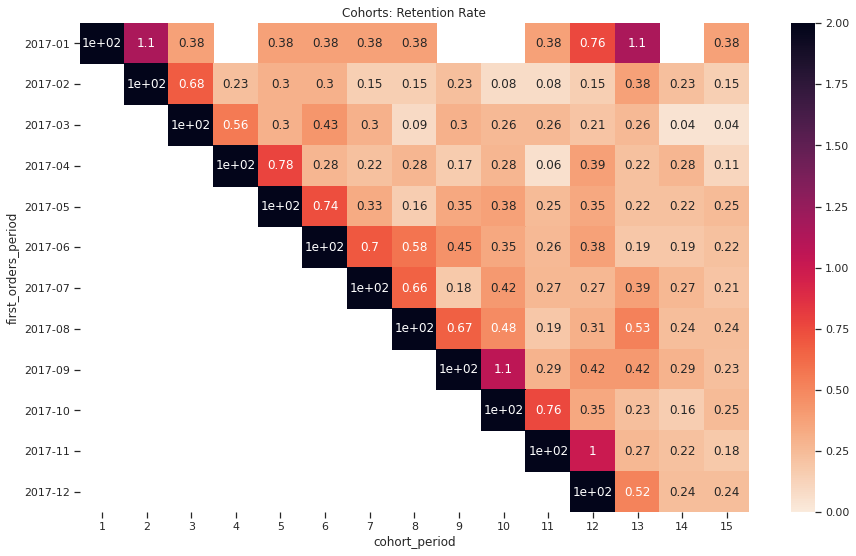

In [194]:
cmap = sns.cm.rocket_r
sns.set(style = 'ticks')
plt.figure(figsize = (15, 9))
plt.xlabel('Cohorts')
plt.title('Cohorts: Retention Rate')
sns.heatmap(table, annot=True, cmap=cmap, vmin=0, vmax=2, center= 1)

In [195]:
# найдем когорту с самым большим CRR на третий месяц
max_crr = cohorts.copy()
max_crr.reset_index(inplace=True)

sp1, sp2=[], []
for i, row in max_crr.iterrows():
    coh=int(row['first_orders_period'].split('-')[1])
    if row['cohort_period'] == (coh+3):
        sp1.append(row['first_orders_period'])
        sp2.append(row['CRR'])

In [196]:
df=pd.DataFrame({'coh': sp1, 'CRR': sp2})
df.loc[df['CRR'].idxmax()]

# Ответ: когорта покупателей, совершивших покупку в июне 2017 года, является когортой с самым большим CRR на третий месяц: 0.45

coh    2017-06
CRR       0.45
Name: 4, dtype: object

# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [197]:
# Таблица с покупками и товарными позициями
purchase_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day,delivered_month,week_in_month,orders_period
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday,2017-05,4.428571,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday,2018-01,4.428571,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday,2018-05,4.428571,2018-06
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday,2018-03,4.428571,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday,2018-07,4.428571,2018-08


In [198]:
# Для расчета R (времени с последней покупки) нам нужна текущая дата. 
NOW = purchase_items['order_delivered_customer_date'].max() + timedelta(days = 1)
NOW

Timestamp('2018-10-18 13:22:46')

Добавим столбец с количеством дней между покупкой и NOW. Далее чтобы найти значения R - нужно будет найти минимум этого
столбца для каждого клиента.

In [199]:
purchase_items['days_after_last_order'] = purchase_items['order_delivered_customer_date'].apply(lambda x: (NOW - x).days)

In [200]:
# Сгруппируем данные по клиентам и посчитаем R, F и M

rfm = purchase_items.groupby('customer_unique_id', as_index=False)  \
            .agg({'days_after_last_order':'min',  \
                  'order_id': 'nunique',  \
                 'price':'sum'})
rfm.rename(columns={'days_after_last_order': 'Recency', 'order_id': 'Frequency', 'price':'Monetary'}, inplace=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.90
2,0000f46a3911fa3c0805444483337064,560,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,324,1,180.00


In [201]:
# Чтобы вывести ранги для данных - необходимо разбить данные на диапазоны. Используем перцентили, отсекающие по 20%
# пользователей
level=[0.2, 0.4, 0.6, 0.8]
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile(level).to_dict()
quantiles

{'Recency': {0.2: 128.0, 0.4: 209.0, 0.6: 301.0, 0.8: 419.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [202]:
# Присвоим ранги для Recency (меньшее значение недавности покупки - лучше)

intervals_R = [0]
for i in range(len(quantiles['Recency'])): 
    intervals_R.append(quantiles['Recency'][level[i]])
intervals_R.append(rfm.Recency.max())
rfm['R'] = pd.cut(rfm.Recency, intervals_R, labels = ['5', '4', '3', '2', '1'])

In [203]:
# % пользователей с одной покупкой
rfm.loc[rfm.Frequency == 1].Frequency.count() / rfm.Frequency.count() * 100

97.0000857118368

Обратим внимание, что для Frequency метод перцентилей не подойдет (для всех перцентилей получаем одинаковые значения: 
у нас 97% пользователей с одной покупкой). В данном случае не хватает информации и товаре, чтобы понимать как правильно
ранжировать эту метрику. Возможно, у нас очень дорогой товар, который приобретается 1-2 раза, и клиенты с колличеством покупок
более 5 - это премиум клиенты. А возможно, что сервис так плохо работает, что клиент, купив один раз, больше не возращается.
Метрика Frequency находится в диапазоне от 1 до 11. Примем во внимание большой объем наблюдений и ранжируем следующим образом:

[1-3] покупки ранг 1
(3-5] покупок ранг 2
(5-7] покупок ранг 3
(7-9] покупок ранг 4
(9-11] покупок ранг 5

In [204]:
# Присвоим ранги для Frequency 
intervals_F = [0, 3, 5, 7, 9, 12]
rfm['F'] = pd.cut(rfm.Frequency, intervals_F, labels = ['1', '2', '3', '4', '5'])

In [205]:
# Присвоим ранги для Monetary (чем больше сумма покупок, тем лучше)
intervals_M = [0]
for i in range(len(quantiles['Monetary'])): 
    intervals_M.append(quantiles['Monetary'][level[i]])
intervals_M.append(rfm.Monetary.max())
rfm['M'] = pd.cut(rfm.Monetary, intervals_M, labels=['1','2','3','4','5'])

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,560,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,324,1,180.00,2,1,5


In [206]:
# скомбинируем значения R, F, M
rfm = rfm.astype({'R':'string', 'F':'string', 'M':'string'})
rfm['RFM_score'] = rfm['R'] + rfm['F'] + rfm['M']
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,560,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,350,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,324,1,180.00,2,1,5,215


In [207]:
# Для того, чтобы понять в какой сегмент попадают пользователи по метрике Frequency - посмотрим еще раз на частоту встречаемости. 
rfm.F.value_counts()

1    93289
2       37
3        8
4        1
Name: F, dtype: Int64

При трех метриках и 5-бальной ранговой системе вариантов комбинаций будет 125. Разобъем пользователей по сегментам, 
в зависимости от RFM_score. 

In [208]:
# Создадим столбец с рангами, чтобы затем заменить его на названия сегментов
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [209]:
segment_map = {
    r'[1-2][1-2][1-2]': 'бездействующие', # покупали давно, мало заказов, маленькая выручка 
    r'[1-2][1-2][3-4]': 'в зоне риска', # покупали давно, мало заказов, средняя выручка 
    r'[1-2][1-5]5': 'не можем потерять', # покупали давно, не мало заказов, высокая выручка 
    r'3[1-2][1-2]': 'спящие', # покупали относительно недавно, мало заказов, маленькая выручка 
    r'3[1-2]3': 'требуют внимание', # покупали относительно недавно, мало заказов, средняя выручка 
    r'[3-4][1-5][4-5]': 'лояльные пользователи', # покупали относительно недавно, не мало заказов, высокая выручка 
    r'4[1-5]1': 'многообещающие', # покупали недавно, не мало заказов, маленькая выручка 
    r'5[1-5]1': 'новые пользователи', # покупали недавно, не мало заказов, маленькая выручка 
    r'[4-5][1-5][2-3]': 'потенциально-лояльные', # покупали недавно, не мало заказов, средняя выручка 
    r'5[1-5][4-5]': 'чемпионы'} # покупали недавно, не мало заказов, высокая выручка 

In [210]:
# Заменим ранги на названия сегментов
rfm['Segment'] = rfm['Segment'].replace(segment_map, regex=True)
rfm.head(3)

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,154,1,129.9,4,1,4,414,лояльные пользователи
1,0000b849f77a49e4a4ce2b2a4ca5be3f,160,1,18.9,4,1,1,411,многообещающие
2,0000f46a3911fa3c0805444483337064,560,1,69.0,1,1,2,112,бездействующие


In [211]:
# посчитаем кол-во пользователей в получившихся сегментах и построим диаграмму

segmentation = rfm.groupby('Segment', as_index=False)  \
                .agg({'customer_unique_id':'count'}) \
                .rename(columns={'customer_unique_id':'count_customer'}) \
                .sort_values('count_customer', ascending=False)
segmentation

,Segment,count_customer
2,бездействующие,15850
4,лояльные пользователи,15264
8,потенциально-лояльные,14463
3,в зоне риска,13827
9,спящие,7847
11,чемпионы,7653
6,не можем потерять,7353
7,новые пользователи,3842
5,многообещающие,3699
10,требуют внимание,3536


In [215]:
fig = px.treemap(segmentation, path=['Segment'], values = 'count_customer')
fig.update_layout(title = "Tree map of Segments", width = 700, height = 500,)
fig.show()

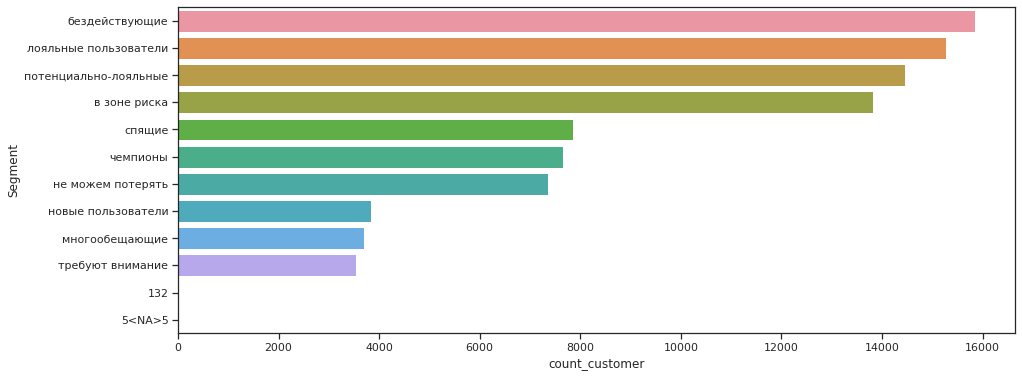

In [216]:
plt.figure(figsize = (15,6))
sns.barplot(x='count_customer', y='Segment', data = segmentation)